<a href="https://colab.research.google.com/github/vkurpmax/Machine-Learning/blob/main/Asia%20University%20Course/AU_ML_03_HW2_03_d_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dsfa
sfa
**F**

In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[0:100, [2, 3]]
y = iris.target[:100]
print('Class labels:', np.unique(y))

Class labels: [0 1]


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [4]:
sc.fit(X_train)

StandardScaler()

In [5]:
X_train_std = sc.transform(X_train)

In [6]:
X_test_std = sc.transform(X_test)

In [7]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [8]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d'
          %(y_test != y_pred).sum())

Misclassified examples: 0


In [9]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 1.000


In [10]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 1.000


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


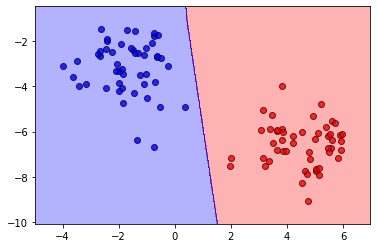

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier

def plot_decision_regions(X, y, classifier, resolution = 0.02):
    markers = ('s', 'x', 'o', '^','v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() -1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:,1].max() + 1
    xx1, xx2= np.meshgrid (np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha= 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

colors = ['red', 'blue']
X, y = make_blobs(n_features=2, centers=2)

for idx, cl in enumerate (np.unique(y)):
    plt.scatter (x=X[y == cl, 0], y= X[y == cl, 1], alpha=0.8, c=colors[idx], label = cl, edgecolor = 'black')

classifier = MLPClassifier()
classifier.fit(X, y)

plot_decision_regions(X, y, classifier, resolution = 0.02)